In [379]:
import json
import requests
import pandas as pd
import spacy
import numpy as np
from textblob import TextBlob
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer


In [380]:
# retrieve random cat facts using random cat facts API and append to a list
def retrieve_cat_facts(url, no_facts):
    responses = list()
    for i in range(0,no_facts):
       response = requests.get(f"{url}")
       data=json.loads(response.text)
       responses.append(data)
    return responses

responses = retrieve_cat_facts(url = 'https://cat-fact.herokuapp.com/facts/random', no_facts = 20)

In [381]:
if response.status_code == 200:
    print('API call Successful')

API call Successful


In [382]:
responses

[{'used': False,
  'source': 'api',
  'type': 'cat',
  'deleted': False,
  '_id': '591f98703b90f7150a19c14e',
  '__v': 0,
  'text': 'Cats can be prone to fleas in the summertime: 794 fleas were counted on one cat by a Cats Protection volunteer in the summer of 1992.',
  'updatedAt': '2020-08-23T20:20:01.611Z',
  'createdAt': '2018-01-04T01:10:54.673Z',
  'status': {'verified': True, 'sentCount': 1},
  'user': '5a9ac18c7478810ea6c06381'},
 {'used': False,
  'source': 'api',
  'type': 'cat',
  'deleted': False,
  '_id': '591f98703b90f7150a19c12d',
  '__v': 0,
  'text': 'Six-toed kittens are so common in Boston and surrounding areas of Massachusetts that experts consider it an established mutation.',
  'updatedAt': '2020-08-23T20:20:01.611Z',
  'createdAt': '2018-01-04T01:10:54.673Z',
  'status': {'verified': True, 'sentCount': 1},
  'user': '5a9ac18c7478810ea6c06381'},
 {'used': False,
  'source': 'user',
  'type': 'cat',
  'deleted': False,
  '_id': '5c75f56272681400147b988a',
  'update

In [383]:
def create_df(number_facts):
    df1 = pd.DataFrame()
    for i in range (0, number_facts):
        print(responses[i]['text'])
        df1 = df.append({'text': responses[i]['text']}, ignore_index=True)
    return df1
    

In [386]:
df = create_df(20)


Cats can be prone to fleas in the summertime: 794 fleas were counted on one cat by a Cats Protection volunteer in the summer of 1992.
Six-toed kittens are so common in Boston and surrounding areas of Massachusetts that experts consider it an established mutation.
There are only two escalators in the state of Wyoming.
In the original Italian version of Cinderella, the benevolent fairy godmother figure was a cat.
Cats lap liquid from the underside of their tongue, not from the top.
Cat is cat.
Unlike humans, cats do not need to blink their eyes on a regular basis to keep their eyes lubricated.
Amount=2.
Abc.
The Amur leopard is one of the most endangered animals in the world.
In 1987 cats overtook dogs as the number one pet in America.
A steady diet of dog food may cause blindness in your cat - it lacks taurine.
Female cats are typically right-pawed while male cats are typically left-pawed.
All cats need taurine in their diet to avoid blindness. Cats must also have fat in their diet as t

In [387]:
nlp = spacy.load('en')

In [388]:
def create_list_of_lists(number_of_facts):
    doc_responses = list()
    for x in range (0, number_of_facts):
        doc = nlp(responses[x]['text'])
        doc_responses.append(doc)
    return doc_responses

In [389]:
doc_responses = create_list_of_lists(20)
doc_responses

[Cats can be prone to fleas in the summertime: 794 fleas were counted on one cat by a Cats Protection volunteer in the summer of 1992.,
 Six-toed kittens are so common in Boston and surrounding areas of Massachusetts that experts consider it an established mutation.,
 There are only two escalators in the state of Wyoming.,
 In the original Italian version of Cinderella, the benevolent fairy godmother figure was a cat.,
 Cats lap liquid from the underside of their tongue, not from the top.,
 Cat is cat.,
 Unlike humans, cats do not need to blink their eyes on a regular basis to keep their eyes lubricated.,
 Amount=2.,
 Abc.,
 The Amur leopard is one of the most endangered animals in the world.,
 In 1987 cats overtook dogs as the number one pet in America.,
 A steady diet of dog food may cause blindness in your cat - it lacks taurine.,
 Female cats are typically right-pawed while male cats are typically left-pawed.,
 All cats need taurine in their diet to avoid blindness. Cats must also 

In [390]:
def getLengthSentences(number_of_facts):
    for z in range (0, number_of_facts):
        #passing the above text example into nlp object
        sentence = nlp(responses[z]['text'])
        #Identify the sentences using attribute
        sentences = list(sentence.sents)
        # Length of the sentences
        print("The length of the sentences:", len(sentences))
        # Reading the sentences
        for sent in sentences:
            print('Sentence: ', sent)
            
getLengthSentences(20)


The length of the sentences: 1
Sentence:  Cats can be prone to fleas in the summertime: 794 fleas were counted on one cat by a Cats Protection volunteer in the summer of 1992.
The length of the sentences: 1
Sentence:  Six-toed kittens are so common in Boston and surrounding areas of Massachusetts that experts consider it an established mutation.
The length of the sentences: 1
Sentence:  There are only two escalators in the state of Wyoming.
The length of the sentences: 1
Sentence:  In the original Italian version of Cinderella, the benevolent fairy godmother figure was a cat.
The length of the sentences: 1
Sentence:  Cats lap liquid from the underside of their tongue, not from the top.
The length of the sentences: 1
Sentence:  Cat is cat.
The length of the sentences: 1
Sentence:  Unlike humans, cats do not need to blink their eyes on a regular basis to keep their eyes lubricated.
The length of the sentences: 1
Sentence:  Amount=2.
The length of the sentences: 1
Sentence:  Abc.
The leng

In [391]:
# Tokenize the doc using token.text attribute
for document in doc_responses:
    for token in document:
        print(token)

Cats
can
be
prone
to
fleas
in
the
summertime
:
794
fleas
were
counted
on
one
cat
by
a
Cats
Protection
volunteer
in
the
summer
of
1992
.
Six
-
toed
kittens
are
so
common
in
Boston
and
surrounding
areas
of
Massachusetts
that
experts
consider
it
an
established
mutation
.
There
are
only
two
escalators
in
the
state
of
Wyoming
.
In
the
original
Italian
version
of
Cinderella
,
the
benevolent
fairy
godmother
figure
was
a
cat
.
Cats
lap
liquid
from
the
underside
of
their
tongue
,
not
from
the
top
.
Cat
is
cat
.
Unlike
humans
,
cats
do
not
need
to
blink
their
eyes
on
a
regular
basis
to
keep
their
eyes
lubricated
.
Amount=2
.
Abc
.
The
Amur
leopard
is
one
of
the
most
endangered
animals
in
the
world
.
In
1987
cats
overtook
dogs
as
the
number
one
pet
in
America
.
A
steady
diet
of
dog
food
may
cause
blindness
in
your
cat
-
it
lacks
taurine
.
Female
cats
are
typically
right
-
pawed
while
male
cats
are
typically
left
-
pawed
.
All
cats
need
taurine
in
their
diet
to
avoid
blindness
.
Cats
must
also
hav

In [392]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
# check the length of stopwords
print("The length of stopwords:", len(stopwords))
for i in list(stopwords)[:5]:
   print(i)


The length of stopwords: 326
n‘t
them
throughout
thereupon
as


In [393]:
def remove_stopwords():
    doc3 = []
    for sentence_t in doc_responses:
        # Printing total number of tokens in doc
        print("Number of tokens in the doc:", len(sentence_t))
        # Removing the stopwords from the doc
        doc2 = []
        for token in sentence_t:
          if not token.is_stop:
            doc2.append(token)
        doc3.append(doc2)
        # Printing total number of tokens in doc after removing stopwords
        print("Number of tokens after removing stopwords:", len(doc2))
    return doc3

doc3 = remove_stopwords()

Number of tokens in the doc: 28
Number of tokens after removing stopwords: 15
Number of tokens in the doc: 22
Number of tokens after removing stopwords: 13
Number of tokens in the doc: 11
Number of tokens after removing stopwords: 4
Number of tokens in the doc: 17
Number of tokens after removing stopwords: 11
Number of tokens in the doc: 15
Number of tokens after removing stopwords: 7
Number of tokens in the doc: 4
Number of tokens after removing stopwords: 3
Number of tokens in the doc: 21
Number of tokens after removing stopwords: 12
Number of tokens in the doc: 2
Number of tokens after removing stopwords: 2
Number of tokens in the doc: 2
Number of tokens after removing stopwords: 2
Number of tokens in the doc: 14
Number of tokens after removing stopwords: 6
Number of tokens in the doc: 13
Number of tokens after removing stopwords: 8
Number of tokens in the doc: 17
Number of tokens after removing stopwords: 11
Number of tokens in the doc: 16
Number of tokens after removing stopwords:

In [394]:
doc3[-1]

[cat, normal, temperature, varies, 101, degrees, Fahrenheit, .]

In [397]:
def removePunctuation(doc3):
    doc4 = []
    #Removing Punctuations
    for sample in doc3:
        doc5 = []
    #Removing the punctuation
        for punc in sample:
            if not punc.is_punct:
                doc5.append(punc) 
        doc4.append(doc5)
    return doc4
doc4 = removePunctuation(doc3)

In [398]:
doc4

[[Cats,
  prone,
  fleas,
  summertime,
  794,
  fleas,
  counted,
  cat,
  Cats,
  Protection,
  volunteer,
  summer,
  1992],
 [toed,
  kittens,
  common,
  Boston,
  surrounding,
  areas,
  Massachusetts,
  experts,
  consider,
  established,
  mutation],
 [escalators, state, Wyoming],
 [original,
  Italian,
  version,
  Cinderella,
  benevolent,
  fairy,
  godmother,
  figure,
  cat],
 [Cats, lap, liquid, underside, tongue],
 [Cat, cat],
 [Unlike, humans, cats, need, blink, eyes, regular, basis, eyes, lubricated],
 [Amount=2],
 [Abc],
 [Amur, leopard, endangered, animals, world],
 [1987, cats, overtook, dogs, number, pet, America],
 [steady, diet, dog, food, cause, blindness, cat, lacks, taurine],
 [Female, cats, typically, right, pawed, male, cats, typically, left, pawed],
 [cats,
  need,
  taurine,
  diet,
  avoid,
  blindness,
  Cats,
  fat,
  diet,
  unable,
  produce],
 [Like,
  birds,
  cats,
  homing,
  ability,
  uses,
  biological,
  clock,
  angle,
  sun,
  Earth,
  magne

In [400]:
def lemmatization(doc4):
    doc7 = []
    # Passing the text into spacy model and store as a doc object
    for sample1 in doc4:
        doc6 = []
        #Lemmatization, printing token and lemmatization side by side
        for token in sample1:
            doc6.append(token.lemma_)
        doc7.append(doc6)
    return doc7
        
doc7 = lemmatization(doc4)

In [401]:
doc7[-1]

['cat', 'normal', 'temperature', 'vary', '101', 'degree', 'Fahrenheit']

In [402]:
def changeDataType(doc7):
    doc9 = []
    for test in doc7:
        str1 = ' '.join(test)
        doc = nlp(str1)
        doc9.append(doc)
    return doc9

doc9 = changeDataType(doc7)

In [430]:
# Parts of speech tagging
doc_pos = []
for token in doc9:
    for j in token:
        print (j, j.tag_, j.pos_, spacy.explain(j.tag_))
        doc_pos.append(j.pos_)

cat NNP PROPN noun, proper singular
prone NNP PROPN noun, proper singular
flea NN NOUN noun, singular or mass
summertime NN NOUN noun, singular or mass
794 CD NUM cardinal number
flea NN NOUN noun, singular or mass
count NN NOUN noun, singular or mass
cat NN NOUN noun, singular or mass
Cats NNPS PROPN noun, proper plural
Protection NNP PROPN noun, proper singular
volunteer NN NOUN noun, singular or mass
summer NN NOUN noun, singular or mass
1992 CD NUM cardinal number
toe NNP PROPN noun, proper singular
kitten NNP PROPN noun, proper singular
common JJ ADJ adjective
Boston NNP PROPN noun, proper singular
surround NN NOUN noun, singular or mass
area NN NOUN noun, singular or mass
Massachusetts NNP PROPN noun, proper singular
expert NN NOUN noun, singular or mass
consider VBP VERB verb, non-3rd person singular present
establish VB VERB verb, base form
mutation NN NOUN noun, singular or mass
escalator NN NOUN noun, singular or mass
state NN NOUN noun, singular or mass
Wyoming NNP PROPN nou

In [404]:
# Visualizing the POS Tags using displacy
#importing displacy
from spacy import displacy
#Passing the doc
displacy.render(doc9, style='dep', jupyter=True, options={'distance': 90})


In [407]:
# Import spaCy Matcher
from spacy.matcher import Matcher

# Initialize the matcher with the spaCy vocabulary
matcher = Matcher(nlp.vocab)

matches = []
for i in doc7:
    print(i)
    str2 = ' '.join(i)
    doc = nlp(str2)
    # Define rule
    pattern = [{'TEXT': 'cat'}, {'TEXT': 'normal'}]
    # Add rule
    matcher.add('rule_1', None, pattern)
    matches.append(matcher)
    matches_found = matcher(doc)
    matches.append(matches_found)


['cat', 'prone', 'flea', 'summertime', '794', 'flea', 'count', 'cat', 'Cats', 'Protection', 'volunteer', 'summer', '1992']
['toe', 'kitten', 'common', 'Boston', 'surround', 'area', 'Massachusetts', 'expert', 'consider', 'establish', 'mutation']
['escalator', 'state', 'Wyoming']
['original', 'italian', 'version', 'Cinderella', 'benevolent', 'fairy', 'godmother', 'figure', 'cat']
['cat', 'lap', 'liquid', 'underside', 'tongue']
['Cat', 'cat']
['unlike', 'human', 'cat', 'need', 'blink', 'eye', 'regular', 'basis', 'eye', 'lubricate']
['Amount=2']
['Abc']
['Amur', 'leopard', 'endanger', 'animal', 'world']
['1987', 'cat', 'overtake', 'dog', 'number', 'pet', 'America']
['steady', 'diet', 'dog', 'food', 'cause', 'blindness', 'cat', 'lack', 'taurine']
['female', 'cat', 'typically', 'right', 'paw', 'male', 'cat', 'typically', 'leave', 'paw']
['cat', 'need', 'taurine', 'diet', 'avoid', 'blindness', 'cat', 'fat', 'diet', 'unable', 'produce']
['like', 'bird', 'cat', 'home', 'ability', 'use', 'biolog

In [408]:
# Finding matches and passing the doc to the matches object
matches

 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(7604275899133490726, 0, 2)]]

In [409]:
score_list = []
for i in doc7:
    str3 = ' '.join(i)
    blob = TextBlob(str3)
    for sentence in blob.sentences:
        score_list.append(sentence.sentiment.polarity)
        print(i,sentence.sentiment.polarity)


['cat', 'prone', 'flea', 'summertime', '794', 'flea', 'count', 'cat', 'Cats', 'Protection', 'volunteer', 'summer', '1992'] 0.0
['toe', 'kitten', 'common', 'Boston', 'surround', 'area', 'Massachusetts', 'expert', 'consider', 'establish', 'mutation'] -0.3
['escalator', 'state', 'Wyoming'] 0.0
['original', 'italian', 'version', 'Cinderella', 'benevolent', 'fairy', 'godmother', 'figure', 'cat'] 0.1875
['cat', 'lap', 'liquid', 'underside', 'tongue'] 0.0
['Cat', 'cat'] 0.0
['unlike', 'human', 'cat', 'need', 'blink', 'eye', 'regular', 'basis', 'eye', 'lubricate'] 0.0
['Amount=2'] 0.0
['Abc'] 0.0
['Amur', 'leopard', 'endanger', 'animal', 'world'] 0.0
['1987', 'cat', 'overtake', 'dog', 'number', 'pet', 'America'] 0.0
['steady', 'diet', 'dog', 'food', 'cause', 'blindness', 'cat', 'lack', 'taurine'] 0.16666666666666666
['female', 'cat', 'typically', 'right', 'paw', 'male', 'cat', 'typically', 'leave', 'paw'] 0.02976190476190476
['cat', 'need', 'taurine', 'diet', 'avoid', 'blindness', 'cat', 'fat'

In [410]:
df = pd.DataFrame(score_list)
df['score'] = df[0]
del df[0]
df

df['Sentiment'] = np.where(df['score'] == 0, 
                          'Neutral', '')
df['Neutral Flag'] = np.where(df['score'] == 0, 
                          1, 0)
df['Sentiment'] = np.where(df['score'] > 0, 
                          'Positive', df['Sentiment'])
df['Positive Flag'] = np.where(df['score'] > 0, 
                          1, 0)
df['Sentiment'] = np.where(df['score'] < 0, 
                          'Negative', df['Sentiment'])
df['Negative Flag'] = np.where(df['score'] < 0, 
                          1, 0)



df['Sentiment']

0      Neutral
1     Negative
2      Neutral
3     Positive
4      Neutral
5      Neutral
6      Neutral
7      Neutral
8      Neutral
9      Neutral
10     Neutral
11    Positive
12    Positive
13    Negative
14    Positive
15     Neutral
16    Positive
17    Positive
18    Positive
19    Positive
Name: Sentiment, dtype: object

In [411]:
import plotly.express as px

fig = px.violin(df, y="score", title='Violin Plot of Sentiment Score')
fig.show()

In [412]:
fig = px.pie(df, names='Sentiment', title='Sentiment Analysis of Random Cat Facts', color_discrete_map={'Thur':'lightcyan',
                                 'Postive ':'green',
                                 'Neutral':'grey',
                                 'Negative':'red'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [413]:
import plotly.express as px
fig = px.bar(df, x="Sentiment",color='Sentiment', title='Bar Chart of Sentiment Anlalysis')
fig.show()

In [414]:
doc7

[['cat',
  'prone',
  'flea',
  'summertime',
  '794',
  'flea',
  'count',
  'cat',
  'Cats',
  'Protection',
  'volunteer',
  'summer',
  '1992'],
 ['toe',
  'kitten',
  'common',
  'Boston',
  'surround',
  'area',
  'Massachusetts',
  'expert',
  'consider',
  'establish',
  'mutation'],
 ['escalator', 'state', 'Wyoming'],
 ['original',
  'italian',
  'version',
  'Cinderella',
  'benevolent',
  'fairy',
  'godmother',
  'figure',
  'cat'],
 ['cat', 'lap', 'liquid', 'underside', 'tongue'],
 ['Cat', 'cat'],
 ['unlike',
  'human',
  'cat',
  'need',
  'blink',
  'eye',
  'regular',
  'basis',
  'eye',
  'lubricate'],
 ['Amount=2'],
 ['Abc'],
 ['Amur', 'leopard', 'endanger', 'animal', 'world'],
 ['1987', 'cat', 'overtake', 'dog', 'number', 'pet', 'America'],
 ['steady',
  'diet',
  'dog',
  'food',
  'cause',
  'blindness',
  'cat',
  'lack',
  'taurine'],
 ['female',
  'cat',
  'typically',
  'right',
  'paw',
  'male',
  'cat',
  'typically',
  'leave',
  'paw'],
 ['cat',
  'need',


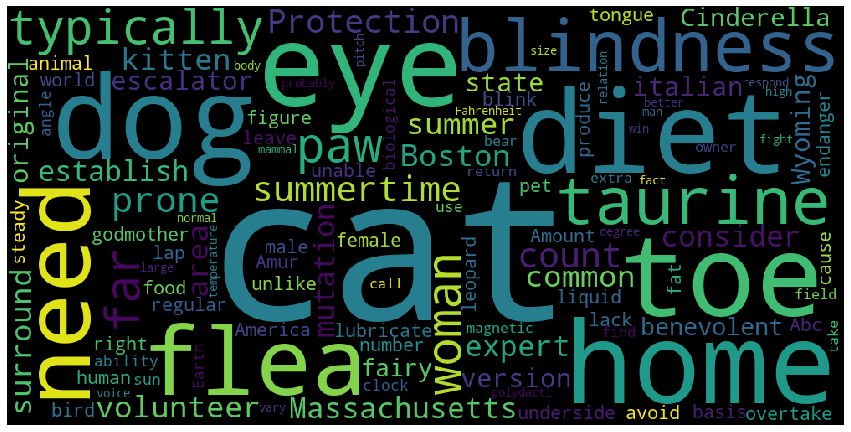

In [415]:
import matplotlib.pyplot as plt
import itertools

merged = list(itertools.chain(*doc7))

#convert list to string and generate
unique_string=(" ").join(merged)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()



In [416]:
merged

['cat',
 'prone',
 'flea',
 'summertime',
 '794',
 'flea',
 'count',
 'cat',
 'Cats',
 'Protection',
 'volunteer',
 'summer',
 '1992',
 'toe',
 'kitten',
 'common',
 'Boston',
 'surround',
 'area',
 'Massachusetts',
 'expert',
 'consider',
 'establish',
 'mutation',
 'escalator',
 'state',
 'Wyoming',
 'original',
 'italian',
 'version',
 'Cinderella',
 'benevolent',
 'fairy',
 'godmother',
 'figure',
 'cat',
 'cat',
 'lap',
 'liquid',
 'underside',
 'tongue',
 'Cat',
 'cat',
 'unlike',
 'human',
 'cat',
 'need',
 'blink',
 'eye',
 'regular',
 'basis',
 'eye',
 'lubricate',
 'Amount=2',
 'Abc',
 'Amur',
 'leopard',
 'endanger',
 'animal',
 'world',
 '1987',
 'cat',
 'overtake',
 'dog',
 'number',
 'pet',
 'America',
 'steady',
 'diet',
 'dog',
 'food',
 'cause',
 'blindness',
 'cat',
 'lack',
 'taurine',
 'female',
 'cat',
 'typically',
 'right',
 'paw',
 'male',
 'cat',
 'typically',
 'leave',
 'paw',
 'cat',
 'need',
 'taurine',
 'diet',
 'avoid',
 'blindness',
 'cat',
 'fat',
 'diet

In [419]:
df

,score,Sentiment,Neutral Flag,Positive Flag,Negative Flag
0,0.000000,Neutral,1,0,0
1,-0.300000,Negative,0,0,1
2,0.000000,Neutral,1,0,0
3,0.187500,Positive,0,1,0
4,0.000000,Neutral,1,0,0
5,0.000000,Neutral,1,0,0
6,0.000000,Neutral,1,0,0
7,0.000000,Neutral,1,0,0
8,0.000000,Neutral,1,0,0
9,0.000000,Neutral,1,0,0


In [420]:
df['text'] = doc7
df

,score,Sentiment,Neutral Flag,Positive Flag,Negative Flag,text
0,0.000000,Neutral,1,0,0,"[cat, prone, flea, summertime, 794, flea, coun..."
1,-0.300000,Negative,0,0,1,"[toe, kitten, common, Boston, surround, area, ..."
2,0.000000,Neutral,1,0,0,"[escalator, state, Wyoming]"
3,0.187500,Positive,0,1,0,"[original, italian, version, Cinderella, benev..."
4,0.000000,Neutral,1,0,0,"[cat, lap, liquid, underside, tongue]"
5,0.000000,Neutral,1,0,0,"[Cat, cat]"
6,0.000000,Neutral,1,0,0,"[unlike, human, cat, need, blink, eye, regular..."
7,0.000000,Neutral,1,0,0,[Amount=2]
8,0.000000,Neutral,1,0,0,[Abc]
9,0.000000,Neutral,1,0,0,"[Amur, leopard, endanger, animal, world]"


In [421]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['score'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')


In [423]:
df['Sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='age',
    linecolor='black',
    yTitle='Count of Sentiment')


In [425]:
len_sentence = []
for i in doc7:
    len_sentence.append(len(i))
len_sentence
df['len_sentence'] = len_sentence
df

,score,Sentiment,Neutral Flag,Positive Flag,Negative Flag,text,len_sentence
0,0.000000,Neutral,1,0,0,"[cat, prone, flea, summertime, 794, flea, coun...",13
1,-0.300000,Negative,0,0,1,"[toe, kitten, common, Boston, surround, area, ...",11
2,0.000000,Neutral,1,0,0,"[escalator, state, Wyoming]",3
3,0.187500,Positive,0,1,0,"[original, italian, version, Cinderella, benev...",9
4,0.000000,Neutral,1,0,0,"[cat, lap, liquid, underside, tongue]",5
5,0.000000,Neutral,1,0,0,"[Cat, cat]",2
6,0.000000,Neutral,1,0,0,"[unlike, human, cat, need, blink, eye, regular...",10
7,0.000000,Neutral,1,0,0,[Amount=2],1
8,0.000000,Neutral,1,0,0,[Abc],1
9,0.000000,Neutral,1,0,0,"[Amur, leopard, endanger, animal, world]",5


In [426]:
df['len_sentence'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [454]:
df_pos

,0,1
0,NOUN,76
1,PROPN,36
2,ADJ,18
3,VERB,16
4,NUM,6
5,ADV,5
6,ADP,1
7,SCONJ,1


In [462]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

counts = Counter(doc_pos)
common = counts.most_common()
df_pos = pd.DataFrame(common)
df_pos

fig = px.bar(df_pos, x=0, y=1, title='Bar Chart of POS')
fig.show()
